In [1]:
from igraph import *
import random
import numpy as np
import matplotlib.pylab as plt

#### 4) Cuál es la diferencia entre una 2-componente y un 2-core? Explique, y construya un ejemplo de red pequeña que tenga un 2-core pero dos 2-componentes.

2-core es donde los nodos estan conectado a los demas con al menos 2 aristas, en cambio 2-componente se produce cuando los nodos que la componen estan conectados por al menos 2 caminos independientes.

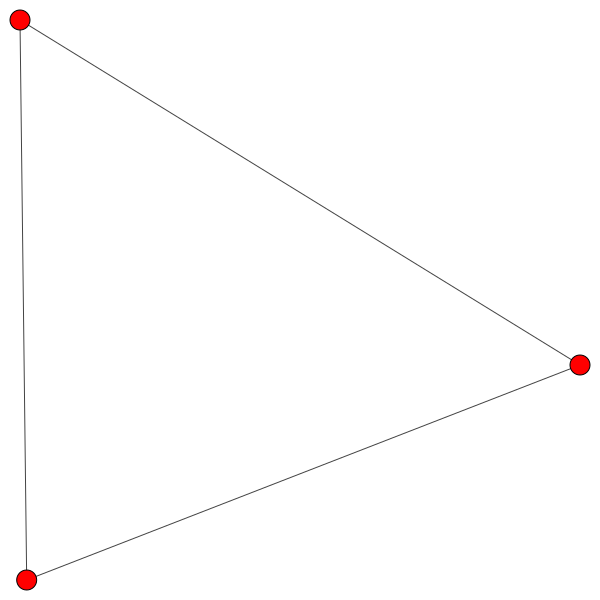

In [2]:
g = Graph()
g.add_vertices(3)
g.add_edges([(0,1), (1,2), (2,0)])
layout = g.layout("kk")
plot(g, layout = layout)

### 6) Baje la red "redchica.gdf".
(a) Grafíquela, indicando junto a cada nodo su grado de entrada, su betweenness, y su valor
de PageRank.



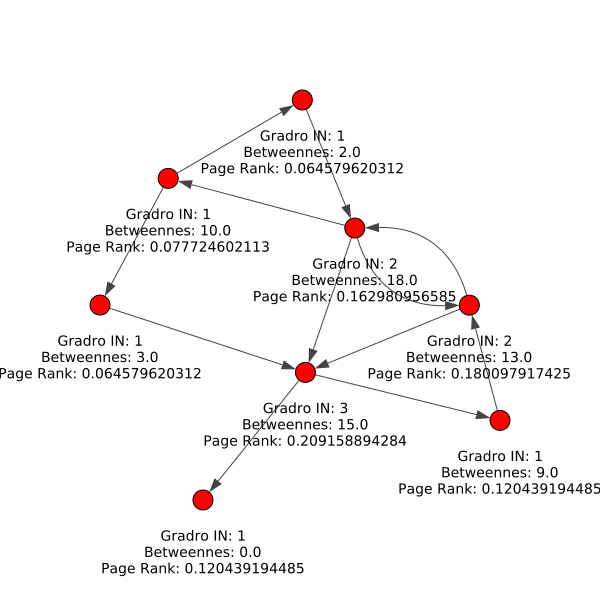

In [16]:
redChica = Graph.Read_GML("Datos/redchica.gml")

namesNodes = redChica.vs["label"]

labels = []
indegree = redChica.vs["indegree"]
betweenness = redChica.betweenness(directed=True, cutoff=8)
pageRanks = redChica.pagerank(vertices=None, directed=True, damping=0.85, weights=None, arpack_options=None, implementation='prpack', niter=1000, eps=0.001)


for i in range(len(indegree)):
    labels.append("Gradro IN: " + str(indegree[i])+
        "\nBetweennes: "+ str(betweenness[i])+
        "\nPage Rank: "+ str(pageRanks[i]))


layout = redChica.layout("fr")
visual_style = {}

visual_style["vertex_label"] = labels
visual_style["layout"] = layout
visual_style['vertex_label_dist']= 3
visual_style["edge_width"]= 1
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 100

plot(redChica, **visual_style)

(b) Haga un ranking de los nodos en función de cada uno de esos tres índices.

In [17]:
def rankMax(lista, nombres):
    rank=[]
    lista = map(float, lista)
    while (1):
        maximo = max(lista)
        
        if maximo==-1:
            break
        
        pos = lista.index(maximo)
        lista[pos]=-1
        rank.append(nombres[pos]+ "->"+ str(maximo))
    return rank

print "\nRanking por grado de entrada (mayor a menor): "
print rankMax(indegree,namesNodes)

print "\nRanking por betweenness (mayor a menor): "
print rankMax(betweenness,namesNodes)

print "\nRanking por Page Ranks (mayor a menor): "
print rankMax(pageRanks,namesNodes)


Ranking por grado de entrada (mayor a menor): 
['v5->3.0', 'v3->2.0', 'v4->2.0', 'v1->1.0', 'v2->1.0', 'v6->1.0', 'v7->1.0', 'v8->1.0']

Ranking por betweenness (mayor a menor): 
['v3->18.0', 'v5->15.0', 'v4->13.0', 'v1->10.0', 'v6->9.0', 'v8->3.0', 'v2->2.0', 'v7->0.0']

Ranking por Page Ranks (mayor a menor): 
['v5->0.209158894284', 'v4->0.180097917425', 'v3->0.162980956585', 'v6->0.120439194485', 'v7->0.120439194485', 'v1->0.077724602113', 'v2->0.064579620312', 'v8->0.064579620312']


(c) Comente sobre las posibles correlaciones entre esos valores, y sus divergencias. P. ej.,hay nodos con mejor PageRank que el esperable por su grado de entrada? O con peor PageRank? Y qué hay de su betweenness? Interprete, a la luz de la red, el por qué de esas discrepancias.

Se aprecia una relacion esperada entre el grado de entrada, Page Ranks y betweenness. Los nodos 5, 3 y 4 son los que poseen grado de entrada mayor a 1, el resto posee grado 1. Se observa que los mayores page ranks y betweenness  estan dispersos en los nodos de mayor grado, sin embargo, estos valores no presentan el mismo orden que el ranking de grados de entrada. Como PageRank y betweenness son medidas de centralidad, ellos estan relacionados con el grado de cada nodo, pero el ranking de grados SOLO considera los arcos entrantes a cada nodo, este puede ser una incidencia en las increpancias de orden de los rankings .

Por otro lado al ser medidas de centralidad si bien poseen relaciones con los grados, tambien se basan en otras propiedades de la red, por ejemplo betweenness se basa en contar caminos mas cortos y PageRank ademas de considerar el nodo en cuestion, considera los nodos que referencian al nodo en cuestion. En conclusion, existe una clara incidencia entre el grado de entrada de un nodo y las madedidas de centralidad, pero esto no implica, que un nodo con grado alto de entrada sea el nodo 'mas central'.

### 10) Genere un grafo ER de 80 nodos, con probabilidad de conexión 0.2. 
- Si llamamos a los nodos {a 1 , a 2 , . . . , a 80 } , entonces denominamos ahora una partición de los nodos en dos grupos como B1 = {a 1 , . . . , a 40 } y B2 = {a 41 , . . . , a 80 } , y otra partición, también en dos grupos, como C1 = {a 1 , . . . , a 20 , a 41 , . . . , a 60 } y C2 = {a 21 , . . . , a 40 , a 61 , . . . , a 80 } .
- Convierta ahora las aristas en arcos orientados, escogiendo al azar cuál punta es cuál, excepto en el caso de las aristas entre B 1 y B 2 : esas oriéntelas con probabilidad p desde B 1 hacia B 2 (y con probabilidad 1 − p en dirección contraria).
- Repita esto para p desde 0 hasta 1, con pasos de 0.1 (o sea, p =0, 0.1, 0.2, 0.3, . . . , 1). En cada ocasión evalúe la medida de modularidad Q d , esto es, la medida modicada por Newman y Leich para aplicarla a redes dirigidas. Evalúela sobre las dos posibles particiones: (B 1 , B 2 ) , y (C 1 , C 2 ) . Graque sus resultados (deberían ser dos curvas, cada una con 11 puntos), e interprételos.


Creación de grafo:

In [5]:
#grafico ER con probabilidad 0.2, no dirigido.
ER = Graph.Erdos_Renyi(80, 0.2)

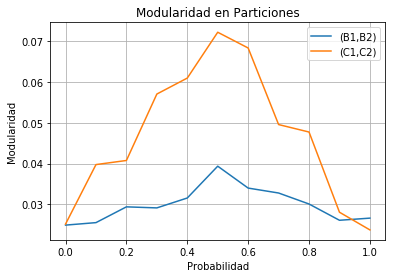

In [6]:
A1_list = []
A2_list = []
for i in range(len(ER.vs)):
    if i < 20:
        A1_list.append(i)

    elif i >= 20 and i < 40:
        A2_list.append(i)

    elif i >= 40 and i < 60:
        A1_list.append(i)

    else:
        A2_list.append(i)


special_edges1 = ER.es.select(_between=(ER.vs[0:40], ER.vs[40:80]))

rep_mod1 = []
rep_mod2 = []

#iteaciones para reducir error
for i in range(10):
    mod1 = []  
    mod2 = []

    for prob in np.arange(0.0, 1.1, 0.1):
        P1 = Graph(80, directed=True)
        P2 = Graph(80, directed=True)
        for edge in ER.es:
            p = random.random() 
            source = edge.tuple[0]
            target = edge.tuple[1]

            if edge in special_edges1:
                if p <= prob:
                    P1.add_edge(source, target)
                    P2.add_edge(source, target)
                else:
                    P1.add_edge(target, source)
                    P2.add_edge(target, source)

            else:
                if p <= 0.5:
                    P1.add_edge(source, target)
                    P2.add_edge(source, target)
                else:
                    P1.add_edge(target, source)
                    P2.add_edge(target, source)

        edges1 = P1.es.select(_between=(ER.vs[0:40], ER.vs[40:80]))
        edges2 = P2.es.select(_between=(ER.vs.select(A1_list), ER.vs.select(A2_list)))

        for e1 in P1.es:
            if e1 not in edges1:
                P1.delete_edges(e1)

        for e2 in P2.es:
            if e2 not in edges1:
                P2.delete_edges(e2)
                
        #greedy para grafo dirigido
        salida = (P1.community_edge_betweenness()).as_clustering()
        salida2 = (P2.community_edge_betweenness()).as_clustering()

        mod1.append(P1.modularity(salida))
        mod2.append(P2.modularity(salida2))

    rep_mod1.append(mod1)
    rep_mod2.append(mod2)

mod1 = [sum(x)/11 for x in zip(*rep_mod1)]
mod2 = [sum(x)/11 for x in zip(*rep_mod2)]

plt.plot(np.arange(0.0, 1.1, 0.1),mod1, label='(B1,B2)')
plt.plot(np.arange(0.0, 1.1, 0.1),mod2 , label= '(C1,C2)')
plt.title("Modularidad en Particiones")
plt.xlabel("Probabilidad") 
plt.ylabel("Modularidad")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()
plt.close()

Se aprecia que en ambas redes cuando p=0.5 existe una mayor modularidad, esto quiere decir que existen conexiones solidas entre las pariticiones creadas. Como p=0.5, se asocia este fenómeno a uno de asignación de dirección de arcos de manera aleatorea (bernoulli).

En genneral, cuando se visualiza la modularidad entre (B1,B2) y (C1,C2), se aprecia que existe menos modularidad en la partición (B1,B2), y esto es a que precisamente, la probabilidad de direción de arcos está sobre los arcos que unen este conjunto y por consecuencia, se debilita la cohesión entre ambos conjuntos.

Por contraparte, hay mayor modularidad en el conjunto (C1,C2) ya que la distribución de probabilidad afecta solo una parte de la conexión entre C1 y C2, por ende, la conexión entre ambos conejuntos tiene una mayor firmeza.

También en ambos métodos existen mínimos en la modularidad cuando la probabilidad es completa (0 o 1), ya que en estos extremos, las direcciones de los arcos no son estocásticas.


### 11) Baje "pescado.gdf". Es una red dirigida y con pesos, que representa las exportaciones de pescado de un país a otro en 1998, medidas en millones de US. O sea: un arco deA a B con peso w indica que el país A le vendió al país B w millones de dólares de pescado

#### (a) Obtenga la matriz de adyacencia de la red y úsela para evaluar la reciprocidad corregida de la red.


In [7]:
pescado = read("Datos/pescado.net")
matrixFish = pescado.get_adjacency()

vertices = matrixFish.shape[0]
arcos = 0

p1 = 0

for i in range(matrixFish.shape[0]):
    for j in range(matrixFish.shape[1]):
        if i != j:
            p1 += matrixFish[i][j]*matrixFish[j][i]
        if matrixFish[i][j] != 0:
            arcos += 1


p1= p1/float(arcos)
print "Reprocicidad: ", p1

A = float(arcos)/(vertices*(vertices-1))

p= (p1-A)/(1-A)

print "Reporcicidad Corregida: ", p

Reprocicidad:  0.467201166181
Reporcicidad Corregida:  0.393755973776


Los valores anteriores indican que existe reprocicidad en la red, ya que las magnitudes son mayores a cero y cercanas a un 40%.

#### (b) [MAG]

#### (c) Grafique las distribuciones P (s in ) y P (s out ) , donde s in (resp. s out ) de un nodo se define como la suma de los pesos de los arcos que entran a él (resp., salen de él), Corresponden a algún tipo de distribución conocida? De ser así, estime sus parámetros.

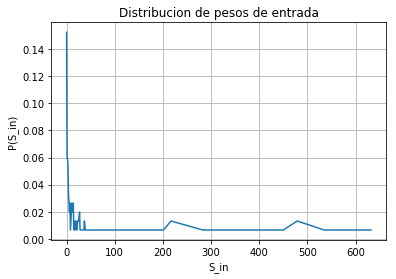

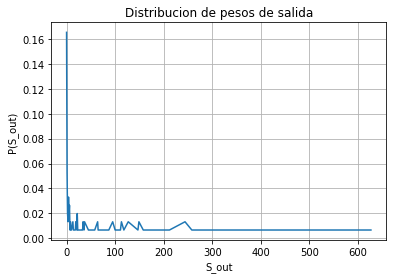

In [8]:
S_in = []
tot_in = 0
S_out = []
tot_out = 0

for nodo in range(len(pescado.vs)):
    cont_in = 0
    cont_out = 0

    for arco in pescado.es.select(_source=nodo):
        cont_out += arco['weight']
        tot_out += arco['weight']

    for arco in pescado.es.select(_to=nodo):
        cont_in += arco['weight']
        tot_in += arco['weight']

    S_in.append(cont_in)
    S_out.append(cont_out)


S_in_plot = sorted(set(map(int,S_in)))
P_S_in_plot =  map( lambda x: map(int,S_in).count(x)/float(len(S_in)) , S_in_plot)

S_out_plot = sorted(set(map(int,S_out)))
P_S_out_plot =  map( lambda x: map(int,S_out).count(x)/float(len(S_out)) , S_out_plot)

plt.plot(S_in_plot[:-15] ,P_S_in_plot[:-15])
plt.title("Distribucion de pesos de entrada")
plt.xlabel("S_in") 
plt.ylabel("P(S_in)")
plt.grid(True)
plt.show()
plt.close()

plt.plot(S_out_plot[:-25] ,P_S_out_plot[:-25])
plt.title("Distribucion de pesos de salida")  
plt.xlabel("S_out") 
plt.ylabel("P(S_out)")
plt.grid(True)
plt.show()
plt.close()

En los gráficos anteriores se observan muchos valores fuera del grupo grueso de la población. Esto quiere decir, que existe una mayor probabilidad de encontrar S_in y S_out en una vecindad cercana a cero (0-10).

Ambos gráficos son similares, pero en ellos no se puede asociar una distribución de probabilidad conocida de manera clara. Siendo optimistas, una distribución que se puede parecer es la exponencial, pero de manera existen montes luego de llegar los valles. Por esta razón se prefiere no estimar parámetros.

#### (d) Plotee (s in , s out ) , para el conjunto de nodos. Se ve algún tipo de relación entre esas 2 variables?

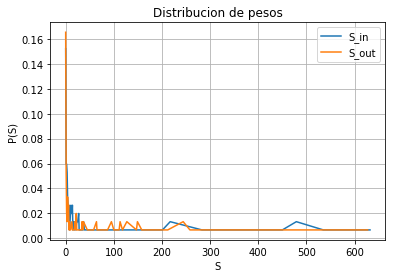

In [9]:
plt.plot(S_in_plot[:-15] ,P_S_in_plot[:-15], label='S_in')
plt.plot(S_out_plot[:-25] ,P_S_out_plot[:-25], label= 'S_out')
plt.title("Distribucion de pesos")
plt.xlabel("S") 
plt.ylabel("P(S)")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()
plt.close()

Son muy similares los dos gráficos ya que ambas distribuciones encuentran sus mayores valores en los nodos cercanos a cero y luego decrecen en una forma parecida a la exponencial. También se observa la existencia de montes luego de alcanzar un mínimo, lo que indica un comportamiento no deseado.

#### Ahora convierta su red en una red no dirigida. Para eso, pondremos una arista entre par de nodos que estaban conectados por uno o dos arcos, y le asociaremos como peso la suma de los pesos de esos arcos.

In [10]:
pescado2 = read("Datos/pescado.net")
pescado2.to_undirected(mode="collapse", combine_edges="sum")
summary(pescado2)

IGRAPH U-W- 151 2103 -- 
+ attr: id (v), weight (e)


#### e) Evalúe P (k) , P (s) y P (w) para esta nueva versión de la red.

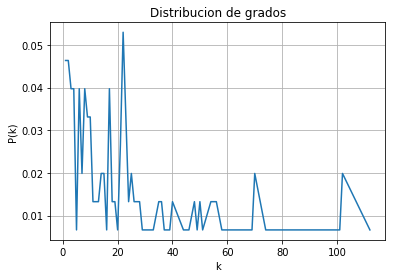

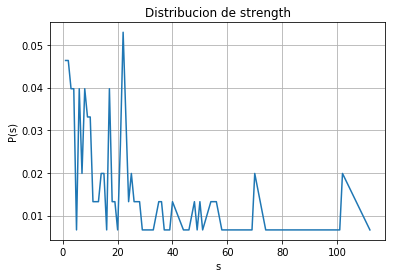

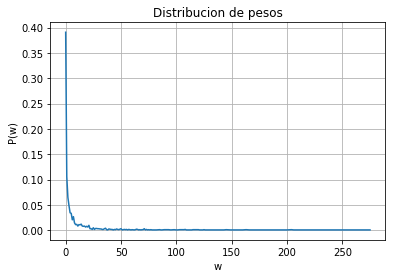

In [19]:
#grados
k= pescado2.outdegree()
k_plot = sorted(set(k))
P_k_plot=  map( lambda x: k.count(x)/float(len(k)) , k_plot)

plt.plot(k_plot , P_k_plot)
plt.title("Distribucion de grados")
plt.xlabel("k") 
plt.ylabel("P(k)")
plt.grid(True)
plt.show()
plt.close()

#strength
s = pescado2.strength()
s_plot = sorted(set(s))
P_s_plot=  map( lambda x: s.count(x)/float(len(s)) , s_plot)

plt.plot(s_plot , P_s_plot)
plt.title("Distribucion de strength")
plt.xlabel("s") 
plt.ylabel("P(s)")
plt.grid(True)
plt.show()
plt.close()

#pesos
w = []
for edge in pescado2.es:
    w.append(edge['weight'])

w_plot = sorted(set(map(int,w)))
P_w_plot =  map( lambda x: map(int,w).count(x)/float(len(w)) , w_plot)

#se extraen los ultimos 40 para tener visual mas clara
plt.plot(w_plot[:-40] , P_w_plot[:-40])
plt.title("Distribucion de pesos")
plt.xlabel("w") 
plt.ylabel("P(w)")
plt.grid(True)
plt.show()
plt.close()

La distribución de grados y de fuerza es exatamente igual, dado a la dependencia de estas variables, mientras que la distribución de pesos posee un comportamiento exponencial.

#### f) Plotee el grado vs la fuerza de los nodos.

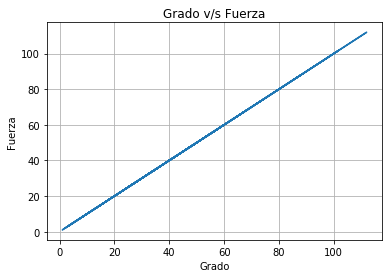

In [12]:
k= pescado2.indegree() #grado
s = pescado2.strength() #fuerza
plt.plot(k , s)
plt.title("Grado v/s Fuerza")
plt.xlabel("Grado") 
plt.ylabel("Fuerza")
plt.grid(True)
plt.show()
plt.close()

Se observa una relación lineal, lo quen indica una dependencia existente entre el grado y la fuerza de un nodo. Este comportanmiento es esperado, ya que la fuerza se define como la suma de los pesos de los arcos conectados a un nodo.

#### g) Evalúe el coeficiente de clustering de la red, con y sin pesos, y grafique también su dependencia respecto al grado.

In [13]:
grados = pescado2.degree()
clus1= pescado2.transitivity_local_undirected(vertices=pescado2.vs, mode="zero")
clus2 = pescado2.transitivity_local_undirected(vertices=pescado2.vs, mode="zero" ,weights= pescado2.es['weight'])

clus_x_degree1 = []
clus_x_degree2 = []

for i in range(max(grados)+1):
    clus_x_degree1.append(list())
    clus_x_degree2.append(list())

    for j in range(len(grados)):
        if i == grados[j]:
            clus_x_degree1[i].append(clus1[j])
            clus_x_degree2[i].append(clus2[j])

plot_clus1 = []
plot_clus2 = []

for i in range(len(clus_x_degree1)):

    if len(clus_x_degree1[i]) > 0:
        plot_clus1.append(sum(clus_x_degree1[i])/len(clus_x_degree1[i]))

    if len(clus_x_degree2[i]) > 0:
        plot_clus2.append(sum(clus_x_degree2[i])/len(clus_x_degree2[i]))


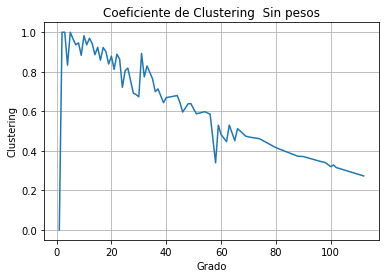

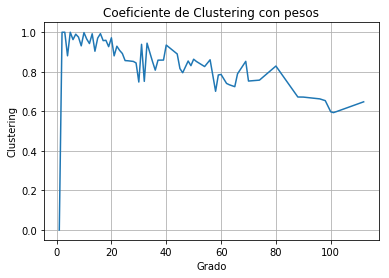

In [20]:
plt.plot(list(set(grados)),plot_clus1, label='Clustering sin Pesos')
plt.title("Coeficiente de Clustering  Sin pesos")
plt.xlabel("Grado")
plt.ylabel("Clustering")
plt.grid(True)
plt.show()
plt.close()

plt.plot(list(set(grados)), plot_clus2, label='Clustering con Pesos')
plt.title("Coeficiente de Clustering con pesos")
plt.xlabel("Grado")
plt.ylabel("Clustering")
plt.grid(True)
plt.show()
plt.close()

En Ambos gráficos se  ebserva una tendencia decreciente a medida que el grado del nodo aumenta, lo que es correcto, ya que a mayor grado, indica mas conexiones con los nodos vecinos y esto tiende a disminuir el grado de agrupación con sus vecinos.
También se observa que el coeficiente de clustering es mayor cuando se consideran los pesos de la red, ya que los pesos tienen relación con la fierza de cohesión y transitividad entre los nodos.